# Dataset: Zachery's Karate Club

In [2]:
import numpy as np
from torch_geometric.datasets import KarateClub

dataset = KarateClub()
data = dataset[0]

print(data)

Data(x=[34, 34], edge_index=[2, 156], y=[34], train_mask=[34])


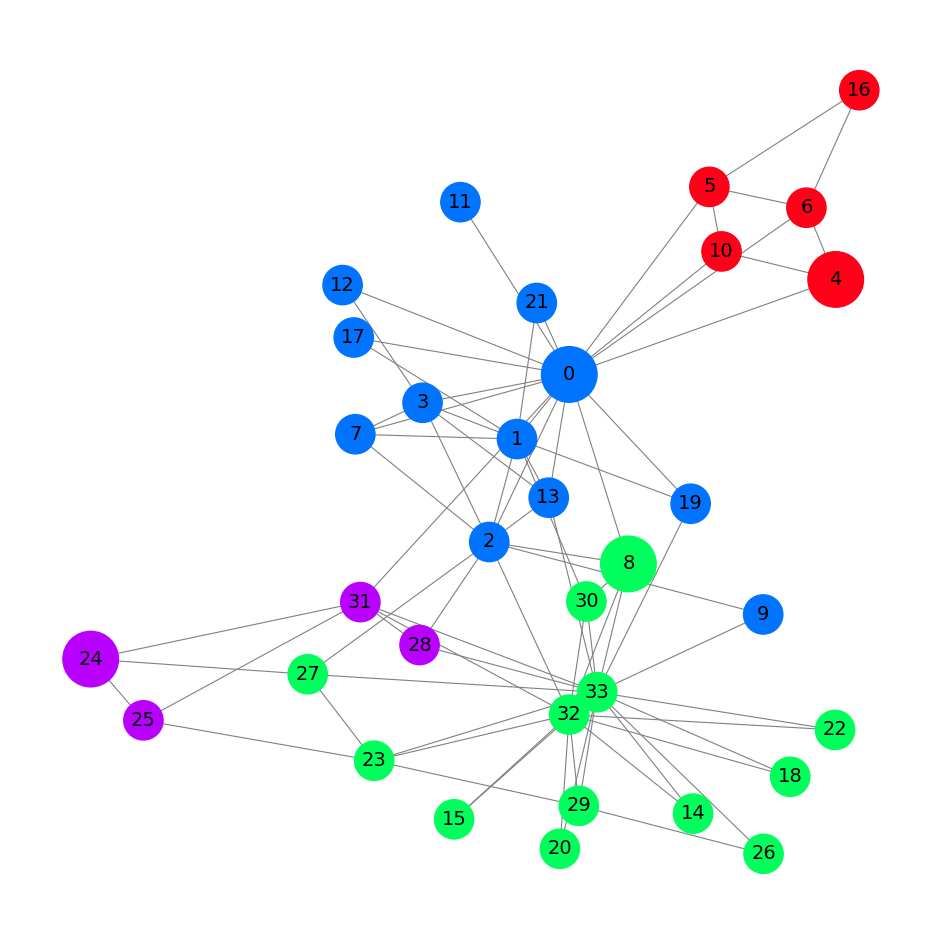

In [3]:
import matplotlib.pyplot as plt
import networkx as nx
from torch_geometric.utils import to_networkx

# highlight the nodes with train_mask == True
node_size = data.train_mask * 800 + 800

G = to_networkx(data, to_undirected=True)
plt.figure(figsize=(12,12))
plt.axis('off')
nx.draw_networkx(G,
                pos=nx.spring_layout(G, seed=0),
                with_labels=True,
                node_size=node_size,
                node_color=data.y,
                cmap="hsv",
                vmin=-2,
                vmax=3,
                width=0.8,
                edge_color="grey",
                font_size=14
                )
plt.show()

# Build a Graph Convoluted Network in PyTorch

In [4]:
import torch
from torch.nn import Linear
from torch_geometric.nn import GCNConv

class GCN(torch.nn.Module):
    def __init__(self, hidden_channels = 3):
        super().__init__()
        self.gcn = GCNConv(data.num_features, hidden_channels)
        self.out = Linear(hidden_channels, 4)

    def forward(self, x, edge_index):
        h = self.gcn(x, edge_index).relu()
        z = self.out(h)
        return h, z
        

Epoch:   0, Loss: 1.4309, Accuracy:  25.00%
Epoch:  10, Loss: 1.3373, Accuracy:  50.00%
Epoch:  20, Loss: 1.2318, Accuracy:  50.00%
Epoch:  30, Loss: 1.1051, Accuracy:  50.00%
Epoch:  40, Loss: 0.9622, Accuracy:  75.00%
Epoch:  50, Loss: 0.8029, Accuracy: 100.00%
Epoch:  60, Loss: 0.6418, Accuracy: 100.00%
Epoch:  70, Loss: 0.4912, Accuracy: 100.00%
Epoch:  80, Loss: 0.3689, Accuracy: 100.00%
Epoch:  90, Loss: 0.2731, Accuracy: 100.00%
Epoch: 100, Loss: 0.2012, Accuracy: 100.00%
Epoch: 110, Loss: 0.1499, Accuracy: 100.00%
Epoch: 120, Loss: 0.1134, Accuracy: 100.00%
Epoch: 130, Loss: 0.0879, Accuracy: 100.00%
Epoch: 140, Loss: 0.0697, Accuracy: 100.00%
Epoch: 150, Loss: 0.0566, Accuracy: 100.00%
Epoch: 160, Loss: 0.0469, Accuracy: 100.00%
Epoch: 170, Loss: 0.0395, Accuracy: 100.00%
Epoch: 180, Loss: 0.0338, Accuracy: 100.00%
Epoch: 190, Loss: 0.0293, Accuracy: 100.00%
Epoch: 200, Loss: 0.0258, Accuracy: 100.00%
Epoch: 210, Loss: 0.0228, Accuracy: 100.00%
Epoch: 220, Loss: 0.0204, Accura

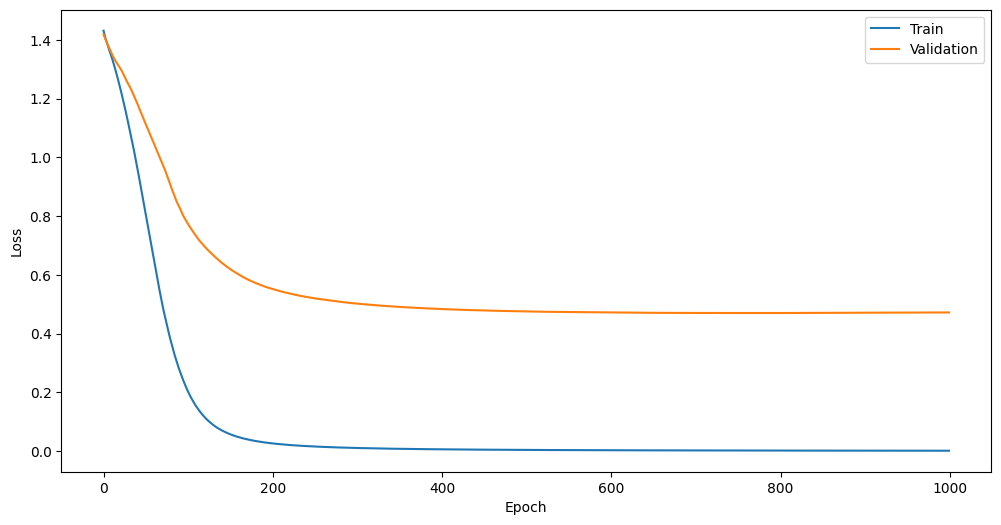

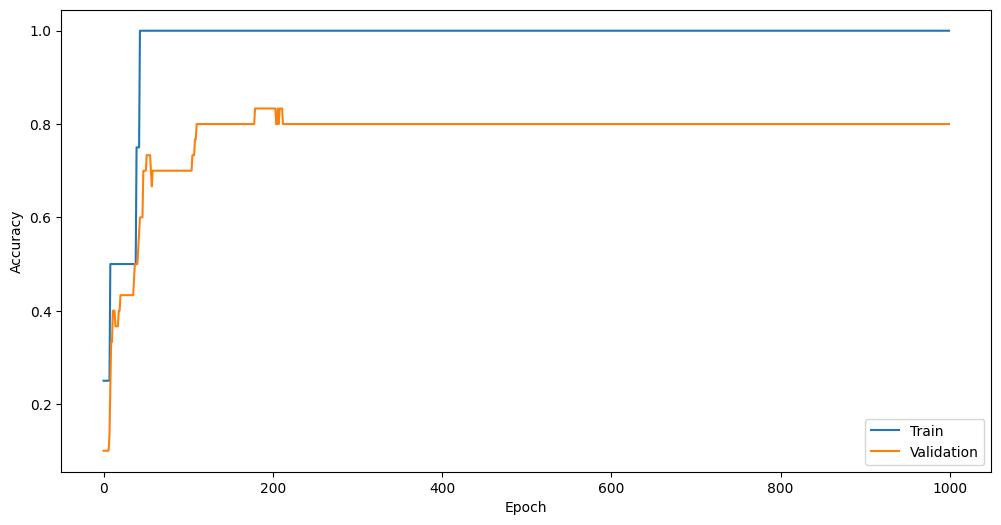

In [5]:
# x = torch.ones((34, 1), dtype=torch.float)
# train_x = x
# test_x = x[~data.train_mask]
x = data.x

y = data.y
train_y = y[data.train_mask]
test_y = y[~data.train_mask]

edge_index = data.edge_index


learning_rate = 0.01
epochs = 1000
hidden_channels = 3
model = GCN(hidden_channels)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

def accuracy(pred_y, y):
    return (pred_y == y).sum() / len(y)

# the training loop
accs = []
losses = []
val_accs = []
val_losses = []

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    h, z = model(x, edge_index)
    train_h, train_z = h[data.train_mask], z[data.train_mask]
    loss = criterion(train_z, train_y)
    loss.backward()
    optimizer.step()

    acc = accuracy(train_z.argmax(dim=1), train_y)
    accs.append(acc)
    losses.append(loss.detach().numpy())

    model.eval()
    with torch.no_grad():
        val_h, val_z = h[~data.train_mask], z[~data.train_mask]
        val_acc = accuracy(val_z.argmax(dim=1), test_y)
        val_loss = criterion(val_z, test_y)
        val_accs.append(val_acc)
        val_losses.append(val_loss.detach().numpy())

    if epoch % 10 == 0:
        print(f"Epoch: {epoch:>3}, Loss: {loss:.4f}, Accuracy: {acc*100:>6.2f}%")
    

plt.figure(figsize=(12, 6))
plt.plot(losses, label="Train")
plt.plot(val_losses, label="Validation")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(accs, label="Train")
plt.plot(val_accs, label="Validation")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
    